# KMNIST Efficient Capsnet Model Train



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

2023-04-12 15:52:08.481956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 15:52:08.589116: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-12 15:52:08.976166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-12 15:52:08.976205: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2023-04-12 15:52:27.678155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 15:52:27.689628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 15:52:27.689762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# 1.0 Import the Dataset

In [4]:
model_name = 'KMNIST'
use_val = True
dataset = Dataset(model_name, use_val=use_val, config_path='../../src/config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

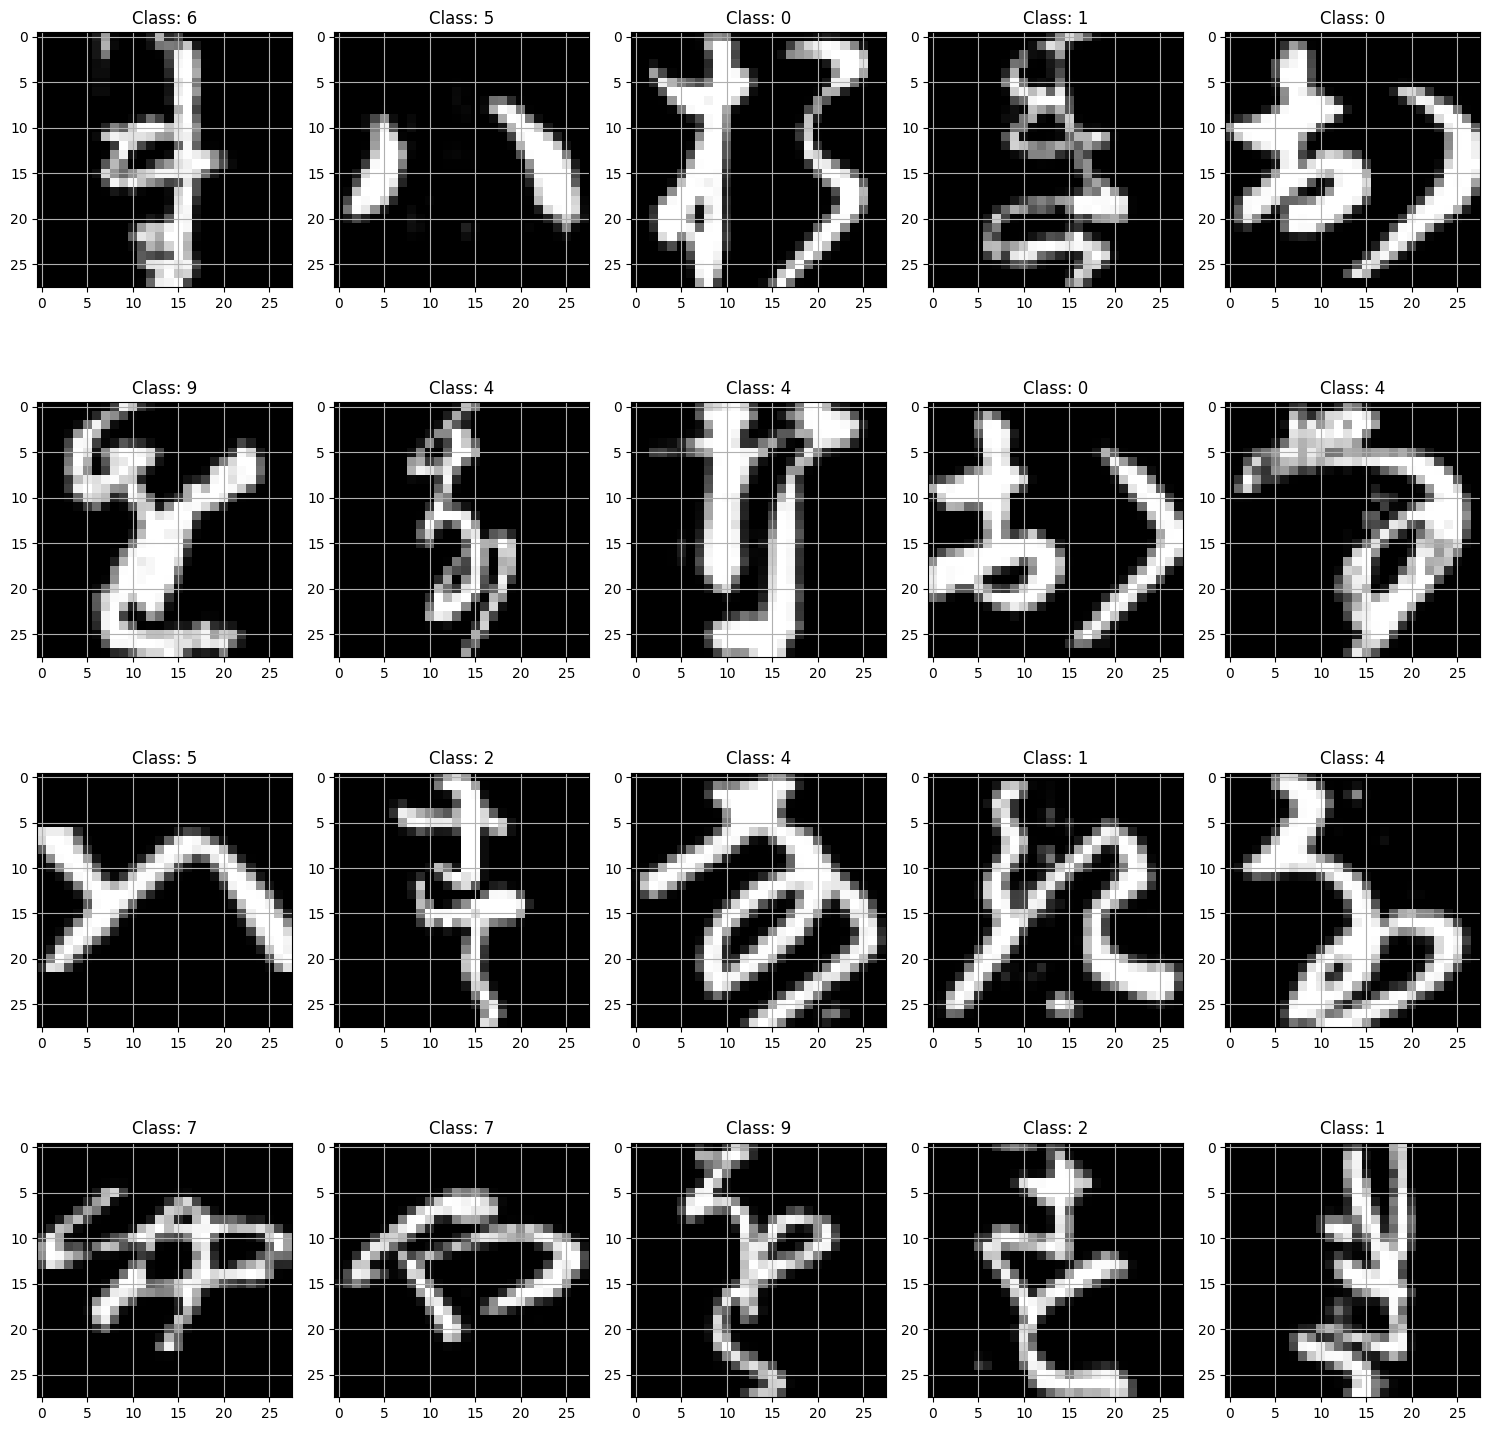

In [5]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_train[:n_images,...,0], dataset.y_train[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [10]:
model_train = EfficientCapsNet(model_name, mode='train', use_val=use_val, verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 22, 22, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 96)  

# 3.0 Train the Model

In [11]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------KMNIST train------------------------------
Layer PrimaryCaps has arguments ['F', 'K', 'N', 'D', 's']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


2023-04-12 16:03:54.176092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 16:03:54.176263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 16:03:54.176350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 16:03:54.176462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 16:03:54.176549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Epoch 1/150
2999/3000 [============================>.] - ETA: 0s - loss: 0.1803 - Efficient_CapsNet_loss: 0.1480 - Generator_loss: 0.0824 - Efficient_CapsNet_accuracy: 0.8671
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.97033, saving model to /home/bukson/projects/kmnist-efcaps/src/models/../../bin/efficient_capsnetKMNIST_new_train.h5
3000/3000 [==============================] - 20s 6ms/step - loss: 0.1803 - Efficient_CapsNet_loss: 0.1479 - Generator_loss: 0.0824 - Efficient_CapsNet_accuracy: 0.8671 - val_loss: 0.0761 - val_Efficient_CapsNet_loss: 0.0418 - val_Generator_loss: 0.0876 - val_Efficient_CapsNet_accuracy: 0.9703 - lr: 2.0000e-04
Epoch 2/150
 402/3000 [===>..........................] - ETA: 14s - loss: 0.0894 - Efficient_CapsNet_loss: 0.0591 - Generator_loss: 0.0772 - Efficient_CapsNet_accuracy: 0.9532

KeyboardInterrupt: 

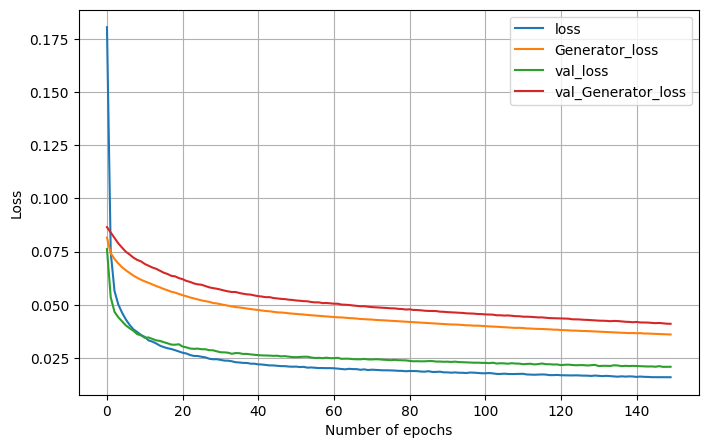

In [8]:
plotHistory(history)

In [12]:
import pandas as pd
pd.DataFrame(history.history).to_csv('kmnist_history.csv')

# 4.0 Test the Model

In [12]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path='bin/efficient_capsnetKMNIST_new_train.h5')
model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_10 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 22, 22, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 20, 96)  

In [13]:
model_test.evaluate(dataset.X_test, dataset.y_test)
# model_train.save_graph_weights()
# model_train.evaluate(dataset.X_test, dataset.y_test)

------------------------------KMNIST Evaluation------------------------------
313/313 [==============================] - 1s 2ms/step
Test acc: 0.9065
Test error [%]: 9.3500%
N° misclassified images: 935 out of 10000
